#### **Name:** Britt Ahn

#### **Course:** CASMA665 <em>Mathematical Neuroscience</em>

#### **Date:** October 1, 2024

#### **Assignment:** Homework 2, <em>Hodgkin-Huxley Neuron</em>

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Document Description**</ins></span>

Address Challenges 1-4 in the following module: <span style="color:darkgoldenrod"><ins>**mark-kramer.github.io/BU-MA665-MA666/HH.html**</ins></span>

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 1**</ins></span>

**This section will address the following questions:**

1. Describe the dynamics during an action potential in the HH model.

2. How does the voltage change?

3. How do the gates open and close?

4. How do the ions flow?

#### **First, define the HH model.**

Define functions for the main HH equations.


In [85]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
# Define alpha and beta functions for activation/inactivation variables m, h, n.

def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

In [169]:
"""
Define a function for the Hodgkin-Huxley equations.

Function name: HH

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt
gK0_i -- max potassium conductance
gNa0_i -- max sodium conductance

Returns:
V -- voltage array
m -- sodium activation variable array
h -- sodium inactivation variable array
n -- potassium activation variable array
t -- time array (milliseconds)
"""

# Define an array called HH which takes arguments I0, T0
def HH(I0,T0, gK0_i, gNa0_i):

    # Define biological constants
    gNa0 = gNa0_i   # sodium conductance [mS/cm^2]
    ENa  = 125;     # equilibrium or Nernst potential for sodium [mV]
    gK0  = gK0_i;   # potassium conductance [mS/cm^2]
    EK   = -12;     # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;     # leak conductance [mS/cm^2]
    EL   = 10.6;    # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;                # time step
    T  = int(np.ceil(T0/dt))

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt  # [ms]
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0  # mV
    m[0]=0.05   # m, h, n have no units because they are probabilities!! from [0,1]
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (i.e. forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);
   
    return V,m,h,n,t

#### **Call the function HH defined above.**

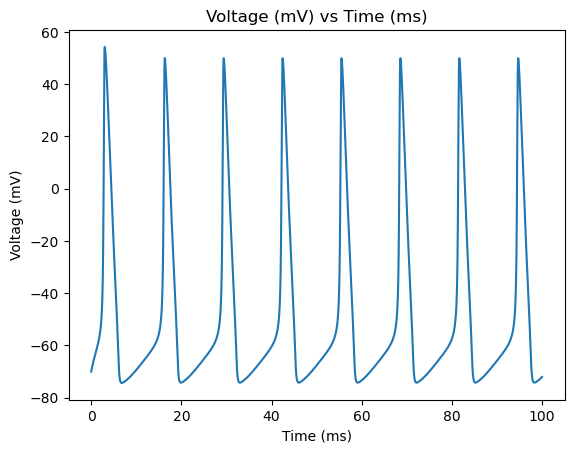

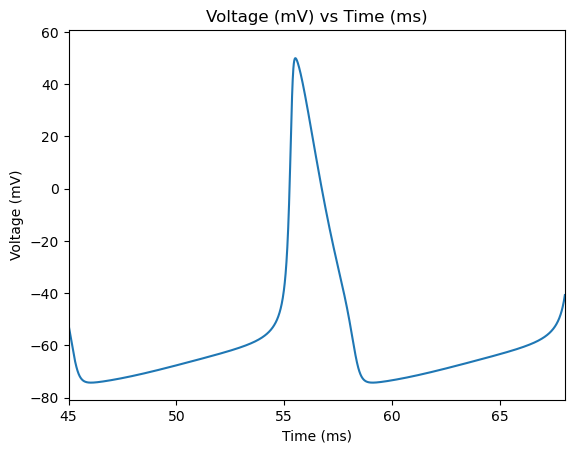

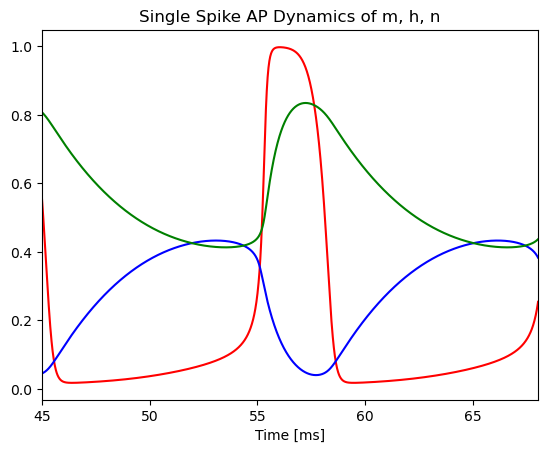

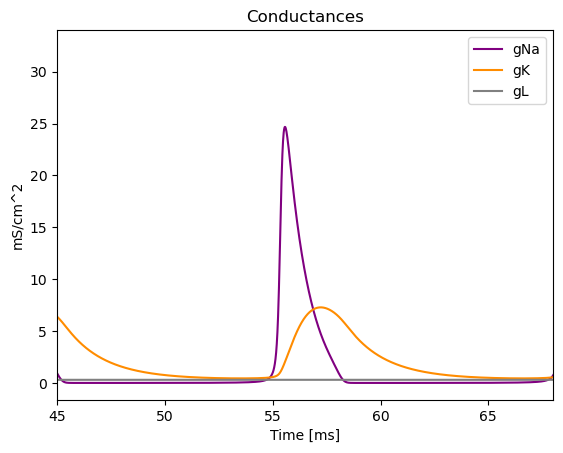

In [164]:
# Call the function HH

# Define the following values as our "default" values
I0 = 5    # input current of 5
T0 = 100  # simulation duration of 100
gK0=15    # max potassium conductance of 15
gNa0=120  # max potassium conductance of 120

# Call the function HH
[V,m,h,n,t]=HH(I0,T0,gK0,gNa0)

# Plot voltages
plt.figure()
plt.title("Voltage (mV) vs Time (ms)")
plt.plot(t,V)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()

# Plot single spike
plt.figure()
plt.title("Voltage (mV) vs Time (ms)")
plt.plot(t,V)
plt.xlim([45, 68])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()

# Plot gating variables m, h, n
plt.figure()
plt.title("Single Spike AP Dynamics of m, h, n")
plt.plot(t,m,'red', label='m')
plt.plot(t,h,'blue', label='h')
plt.plot(t,n,'green', label='n')
plt.xlim([45, 68])
plt.xlabel('Time [ms]')
plt.show()


####################
# Plot conductances

# Define conductances
gNa  = gNa0*(m**3)*h                 # Sodium conductance array
gK   = gK0*(n**4)                    # Potassium conductance array
gL  = 0.3*(n/n)                     # Leak conductance array; multiply by 1 (n/n) to create array of equal shape as gK, gNa

# Plot conductances in 1 graph
plt.figure()
plt.title("Conductances")
plt.plot(t,gNa,'purple', label='gNa')#... and plot the sodium conductance,
plt.plot(t,gK, 'darkorange', label='gK') #... and plot the potassium conductance,
plt.plot(t,gL, 'gray', label='gL') #... and plot the leak conductance.
plt.xlim([45, 68])
plt.xlabel('Time [ms]')             #... label the x-axis.
plt.ylabel('mS/cm^2')               #... and label the y-axis.
plt.legend()                        #... make a legend.
plt.show()


### **Revisit Challenge 1 Questions:**

1. Describe the dynamics during an action potential in the HH model.


   ANSWER

3. How does the voltage change?

   ANSWER

5. How do the gates open and close?

   ANSWER

6. How do the ions flow?
    ANSWER


<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 2**</ins></span>

**This section will address::**

1. Determine how the firing rate of the HH model varies with input current I.

2. Plot the firing rate versus I (i.e., plot the “f-I curve”).

#### **First, test the function: find_peaks**

An array of indices of the array, arr_x, in which there are peaks:  [2 4 6]
Number of peaks:  3


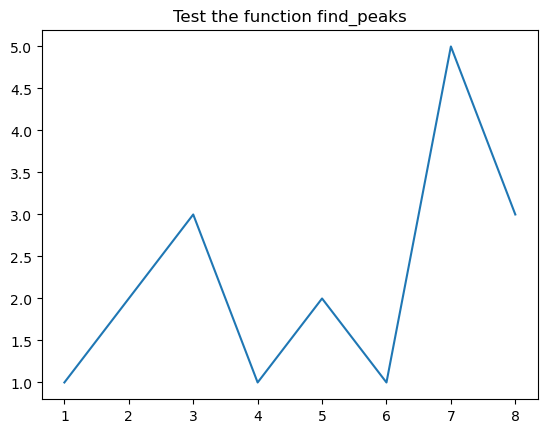

In [116]:
# Test the function find_peaks

arr_x=[1, 2, 3, 4, 5, 6, 7, 8]
y=[1, 2, 3, 1, 2, 1, 5, 3]

print("An array of indices of the array, arr_x, in which there are peaks: ", (find_peaks(y)[0]))
print("Number of peaks: ", (find_peaks(y)[0]).size)

plt.figure()
plt.title("Test the function find_peaks")
plt.plot(arr_x,y)
plt.show()

#### **Then, define a function which computes the firing rate using HH model.**

Firing rate:  80.0  (initial  vals I0=5, gK0=15, gNa0=120)


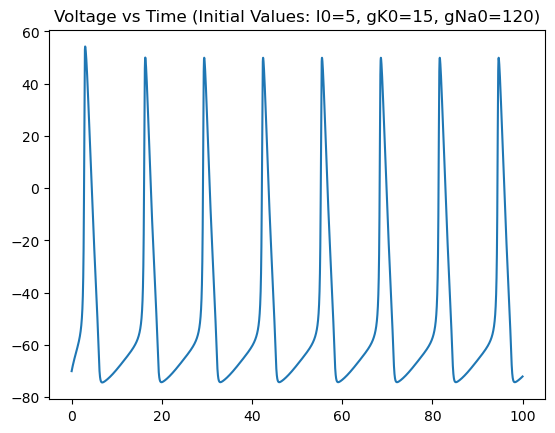

In [176]:
"""
Define a function to compute the firing rate of a HH model.

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt

Returns:
firing_rate --- firing rate (spikes per second)
t --- time array (ms)
V --- voltage array
"""

def HH_firingrate(I0, T0, gK0_i, gNa0_i):

    # Define biological constants
    gNa0 = gNa0_i   # sodium conductance [mS/cm^2]
    ENa  = 125;     # equilibrium or Nernst potential for sodium [mV]
    gK0  = gK0_i;   # potassium conductance [mS/cm^2]
    EK   = -12;     # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;     # leak conductance [mS/cm^2]
    EL   = 10.6;    # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;   # time step
    T  = int(np.ceil(T0/dt))  # [ms]

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);

    # Create voltage array (list of voltages)
    voltages=[]
    for i in range(V.size):
        voltages.append(V[i][0])

    
    ###############################
    
    # Compute the firing rate
    
    # initialize spike count at 0
    spike_count=0

    # find_peaks(voltages)[0] gives the indices in which there are peaks in the voltage array
    # find_peaks(voltages)[0].size gives the number of peaks in the voltage array
    for i in find_peaks(voltages)[0]:  # for each index in which there is a peak in the voltage array,
        if voltages[i] >= 0:           # if the peak is a positive voltage, then this is a spike
            spike_count+=1             # increase spike count by 1.
    
    firing_rate = spike_count/.1  # spikes/second

    return firing_rate,t,V



#################
# Call function HH_firingrate

# frate_i represents the firing rate for iniital input values: gK0=15, gNa0=120, I0=5, T0=100
# t_i represents time array for iniital input values: gK0=15, gNa0=120, I0=5, T0=100
# V_i represents voltage array for for iniital input values: gK0=15, gNa0=120, I0=5, T0=100
frate_i,t_i,V_i = HH_firingrate(5,100,15,120)

print("Firing rate: ", frate_i, " (initial  vals I0=5, gK0=15, gNa0=120)")

plt.figure()
plt.title("Voltage vs Time (Initial Values: I0=5, gK0=15, gNa0=120)")
plt.plot(t_i,V_i)
plt.show()


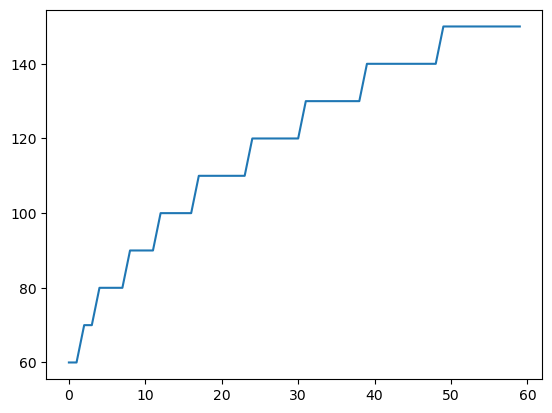

In [23]:
# Initialize arrays of currents, firing rates
arr_I = []
arr_frates = []
T0 = 100

for i in range(0,60):  # 0 to 99
    arr_I.append(i)

# Recursively call the HH_firingrate(I0,T0) function.
for i in arr_I:
    arr_frates.append(HH_firingrate(i,T0,15,120)[0])
    # print(arr_frates)

plt.figure()
plt.plot(arr_I, arr_frates)
plt.show()


#### **Answer questions from Challenge 2:**

1. Determine how the firing rate of the HH model varies with input current I.

   ANSWER

2. Plot the firing rate versus I (i.e., plot the “f-I curve”).

   ANSWER

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 3**</ins></span>

**Let's address:**

1. How does the firing rate of the HH model change as you increase the potassium conductance?

3. Provide a “simulation” explanation and a “physical” explanation.

#### **Begin by calling HH_firingrate function using an increased value of gK0=35 (rather than gK0=15).**

Firing rate:  80.0  (I0=5, gK0=15, gNa0=120) (initial values)
Firing rate:  60.0  (I0=5, gK0=35, gNa0=120) (increased gK0=35) 



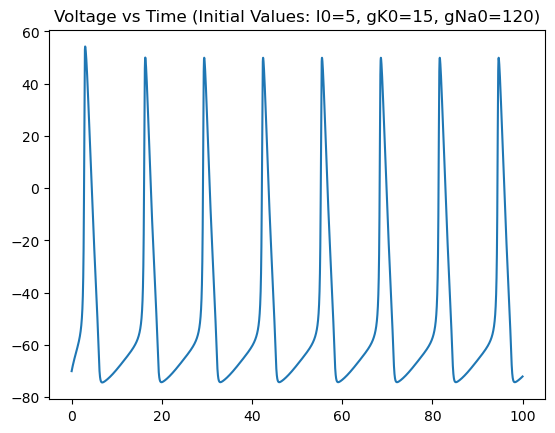

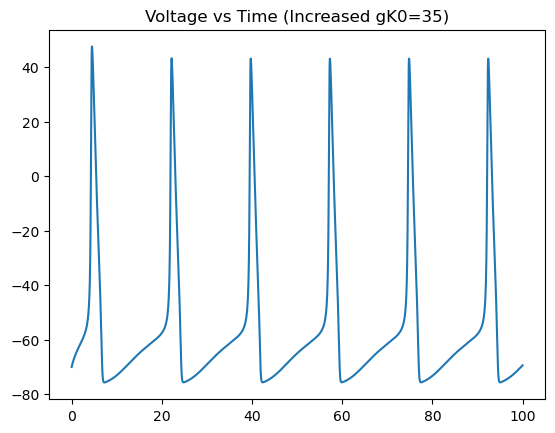

In [183]:
# Call HH_firingrate(I0,T0,gK0_i,gNa0_i) function
# Increase gK0 from 15 to 35.

frate_gK0_35,t_gK0_35,V_gK0_35 = HH_firingrate(5,100,35,120)

print("Firing rate: ", frate_i, " (I0=5, gK0=15, gNa0=120) (initial values)")
print("Firing rate: ", frate_gK0_35, " (I0=5, gK0=35, gNa0=120) (increased gK0=35) \n")

plt.figure()
plt.title("Voltage vs Time (Initial Values: I0=5, gK0=15, gNa0=120)")
plt.plot(t_i,V_i)
plt.show()

# Plot voltage vs time for increased gK0=35
plt.figure()
plt.title("Voltage vs Time (Increased gK0=35)")
plt.plot(t_gK0_35,V_gK0_35)
plt.show()


#### **Answer Challenge 3 Questions:**

1. How does the firing rate of the HH model change as you increase the potassium conductance?

   Answer

2. Provide a “simulation” explanation and a “physical” explanation.

   Answer

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 4**</ins></span>

**In Challenge 4, we will address:**

1. How does the firing rate of the HH model change as you increase sodium conductance?

2. Provide a “simulation” explanation and a “physical” explanation.

Firing rate:  80.0  (gNa0=120) (initial values)
Firing rate:  60.0  (gNa0=50) (initial values)


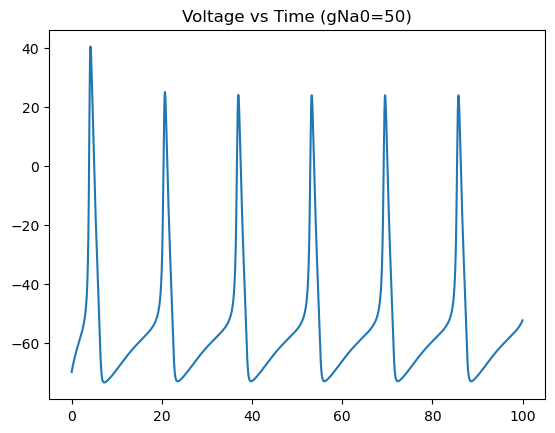

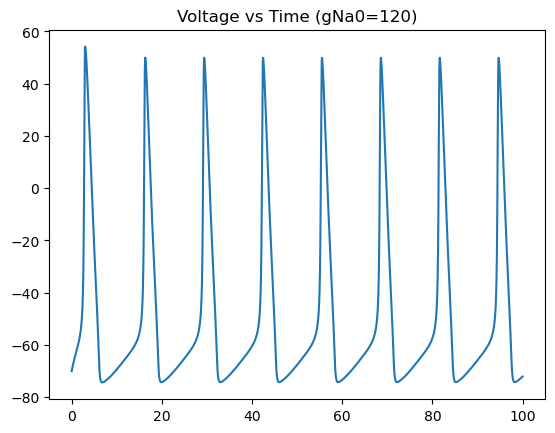

In [73]:
# Call HH_firingrate(I0,T0,gK0_i,gNa0_i) function
# Increase gNa0 from 50 to 120.

frate_gNa0_50,t_gNa0_50,V_gNa0_50 = HH_firingrate(5,100,15,50)

print("Firing rate: ", frate_i, " (gNa0=120) (initial values)")
print("Firing rate: ", frate_gNa0_50, " (gNa0=50) (initial values)")

# Plot voltage vs time
plt.figure()
plt.title("Voltage vs Time (gNa0=50)")
plt.plot(t_gNa0_50,V_gNa0_50)
plt.show()

plt.figure()
plt.title("Voltage vs Time (gNa0=120)")
plt.plot(t_i,V_i)
plt.show()



#### **In Challenge 4, we will address:**

1. How does the firing rate of the HH model change as you increase sodium conductance?

   Answer

2. Provide a “simulation” explanation and a “physical” explanation.

   Answer

<pre>
    
</pre>


___

<pre>
    
</pre>


## <span style="color:cornflowerblue"><ins>**Reflections**</ins></span>

write reflections